# Cosmological Models with No Big Bang

In [18]:
from GrTiPy import *
init_printing()

In [19]:
d=4
t, psi, theta, phi= symbols('t  psi theta phi ')
u=np.array([t, psi, theta, phi])

In [20]:
u[0]

In [21]:
u[1]

In [22]:
u[2]

In [23]:
u[3]

In [24]:
c = Function('c')(t)
a = Function('a')(t)

In [25]:
c

In [26]:
a

In [27]:
g00 =   -c**2
g11 =  a**2
g22 =  a**2*sin(psi)**2
g33 =  a**2*sin(psi)**2*sin(theta)**2

In [28]:
g=np.array([[g00,0,0,0],[0,g11,0,0],\
            [0,0,g22,0],[0,0,0,g33]])
gin=inverse_metric(g)

In [29]:
g[0][0]

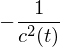

In [30]:
gin[0][0]

In [31]:
gin

array([[-1/c(t)**2, 0, 0, 0],
       [0, a(t)**(-2), 0, 0],
       [0, 0, 1/(a(t)**2*sin(psi)**2), 0],
       [0, 0, 0, 1/(a(t)**2*sin(psi)**2*sin(theta)**2)]], dtype=object)

In [32]:
for i in range(d):
    for j in range(d):
        for k in range(d):
            if Christoffel_n_ab(d,u,g,gin,i,j,k) !=0:
                print("G(", u[i] ,u[j],u[k], ")="\
                , simplify(Christoffel_n_ab(d,u,g,gin,i,j,k)))

G( t t t )= Derivative(c(t), t)/c(t)
G( t psi psi )= a(t)*Derivative(a(t), t)/c(t)**2
G( t theta theta )= a(t)*sin(psi)**2*Derivative(a(t), t)/c(t)**2
G( t phi phi )= a(t)*sin(psi)**2*sin(theta)**2*Derivative(a(t), t)/c(t)**2
G( psi t psi )= Derivative(a(t), t)/a(t)
G( psi psi t )= Derivative(a(t), t)/a(t)
G( psi theta theta )= -sin(2*psi)/2
G( psi phi phi )= -sin(psi)*sin(theta)**2*cos(psi)
G( theta t theta )= Derivative(a(t), t)/a(t)
G( theta psi theta )= 1/tan(psi)
G( theta theta t )= Derivative(a(t), t)/a(t)
G( theta theta psi )= 1/tan(psi)
G( theta phi phi )= -sin(2*theta)/2
G( phi t phi )= Derivative(a(t), t)/a(t)
G( phi psi phi )= 1/tan(psi)
G( phi theta phi )= 1/tan(theta)
G( phi phi t )= Derivative(a(t), t)/a(t)
G( phi phi psi )= 1/tan(psi)
G( phi phi theta )= 1/tan(theta)


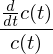

In [33]:
Christoffel_n_ab(d,u,g,gin,0,0,0)

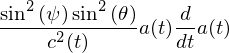

In [34]:
Christoffel_n_ab(d,u,g,gin,0,3,3)

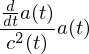

In [35]:
Christoffel_n_ab(d,u,g,gin,0,1,1)

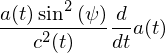

In [36]:
Christoffel_n_ab(d,u,g,gin,0,2,2)

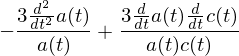

In [38]:
expand(Ricci_Tensor_ab(d,u,g,gin,0,0))

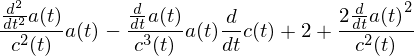

In [39]:
expand(Ricci_Tensor_ab(d,u,g,gin,1,1))

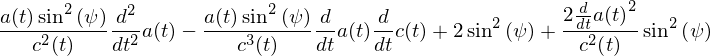

In [40]:
expand(Ricci_Tensor_ab(d,u,g,gin,2,2))

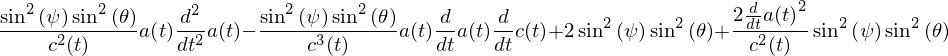

In [41]:
expand(Ricci_Tensor_ab(d,u,g,gin,3,3))

In [42]:
def R(d,u,g,gin,a,b):
    sum=0.0
    for i in range(d):
        sum=sum+gin[a][i]*Ricci_Tensor_ab(d,u,g,gin,i,b)
    return sum

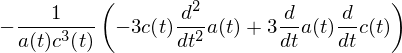

In [43]:
R(d,u,g,gin,0,0)

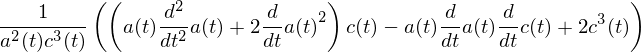

In [44]:
R(d,u,g,gin,1,1)

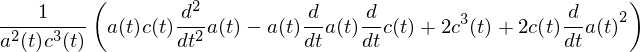

In [45]:
R(d,u,g,gin,2,2)

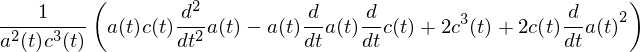

In [46]:
R(d,u,g,gin,3,3)

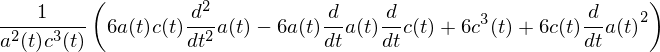

In [48]:
factor(Ricci_scalar(d,u,g,gin))

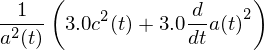

In [50]:
simplify(Einstein_Equation_ab(d,u,g,gin,0,0))

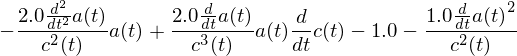

In [51]:
simplify(Einstein_Equation_ab(d,u,g,gin,1,1))

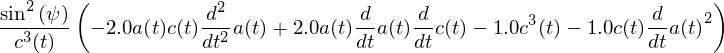

In [52]:
simplify(Einstein_Equation_ab(d,u,g,gin,2,2))

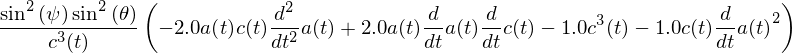

In [53]:
simplify(Einstein_Equation_ab(d,u,g,gin,3,3))

In [57]:
rho = Function('rho')(t)
P   = Function('P')(t)


In [58]:
rho

In [59]:
T00 = roh *gin[0][0]
T11 = P * gin[1][1]
T22 = P * gin[2][2]
T33 = P * gin[3][3]

In [60]:
T=np.array([[T00,0,0,0],[0,T11,0,0],\
            [0,0,T22,0],[0,0,0,T33]])

In [61]:
def CovD(d,x,g,gin,T,b,c,a):
    DD=diff(T[b][c],x[a])
    summ=0.0
    for i in range(d):
        summ=summ+ Christoffel_n_ab(d,u,g,gin,b,a,i)*T[i][c]+Christoffel_n_ab(d,u,g,gin,c,a,i)*T[b][i]
    CovD= DD+summ
    return CovD

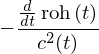

In [63]:
CovD(d,u,g,gin,T,0,0,0)

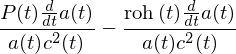

In [65]:
CovD(d,u,g,gin,T,1,0,1)

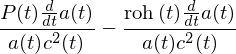

In [66]:
CovD(d,u,g,gin,T,2,0,2)

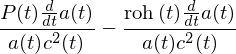

In [67]:
CovD(d,u,g,gin,T,3,0,3)

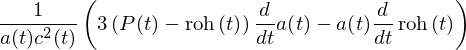

In [72]:
simplify(CovD(d,u,g,gin,T,0,0,0)+CovD(d,u,g,gin,T,1,0,1)+CovD(d,u,g,gin,T,2,0,2)+CovD(d,u,g,gin,T,3,0,3))

In [73]:
P=0

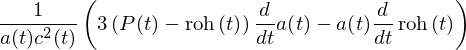

In [74]:
simplify(CovD(d,u,g,gin,T,0,0,0)+CovD(d,u,g,gin,T,1,0,1)+CovD(d,u,g,gin,T,2,0,2)+CovD(d,u,g,gin,T,3,0,3))

In [75]:
latex(simplify(CovD(d,u,g,gin,T,0,0,0)+CovD(d,u,g,gin,T,1,0,1)+CovD(d,u,g,gin,T,2,0,2)+CovD(d,u,g,gin,T,3,0,3)))

'\\frac{1}{a{\\left (t \\right )} c^{2}{\\left (t \\right )}} \\left(3 \\left(P{\\left (t \\right )} - \\operatorname{roh}{\\left (t \\right )}\\right) \\frac{d}{d t} a{\\left (t \\right )} - a{\\left (t \\right )} \\frac{d}{d t} \\operatorname{roh}{\\left (t \\right )}\\right)'